In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [3]:
df = pd.read_csv("C:/Users/lamia/Downloads/heart/heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


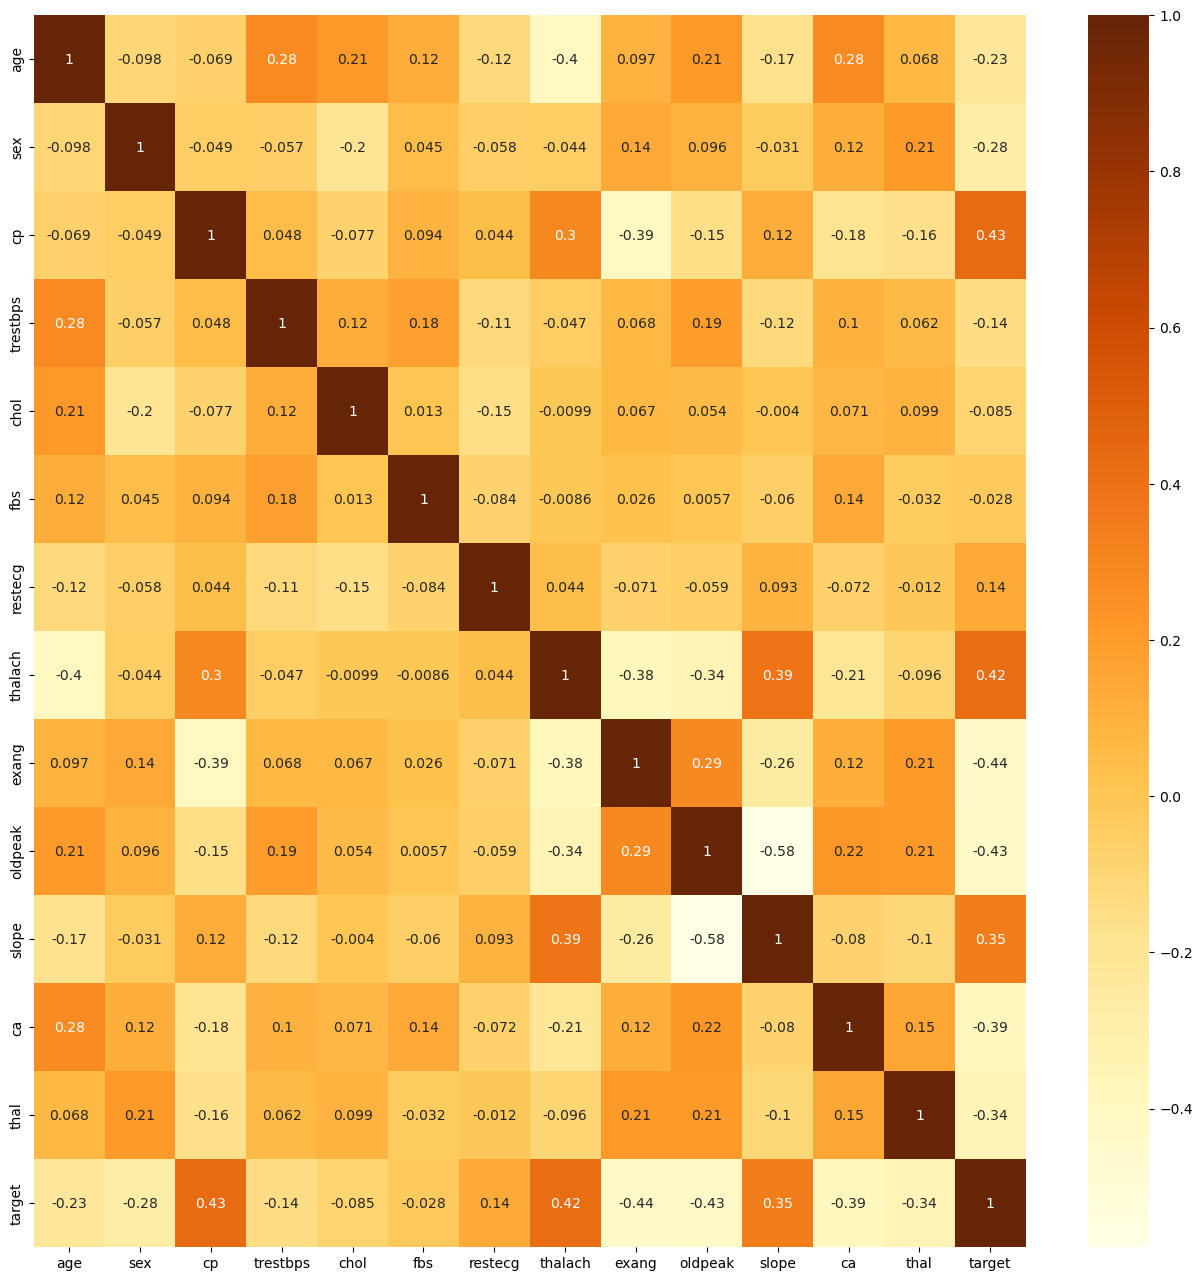

In [4]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlOrBr")
plt.show()

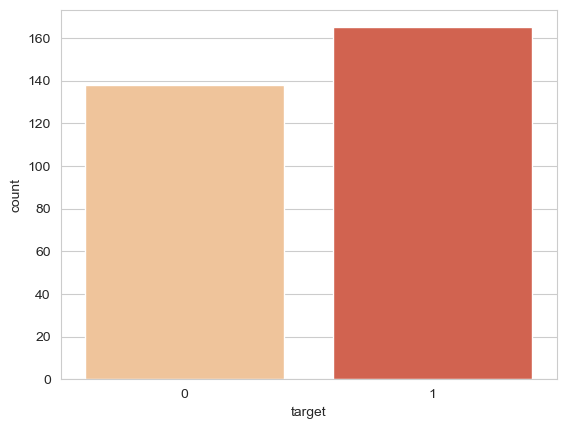

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='OrRd')
plt.show()

In [6]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 
                                        'fbs','restecg', 
                                        'exang', 'slope', 
                                        'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [7]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [21]:
from sklearn.model_selection import cross_val_score
n_scores = []
for n in range(1,10):
    n_classifier = RandomForestClassifier(n_estimators = n)
    score=cross_val_score(n_classifier,X,y,cv=10)
    n_scores.append(score.mean())

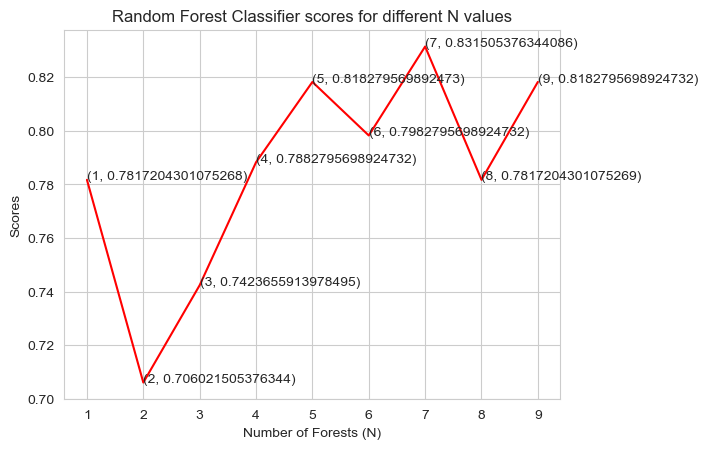

In [24]:
plt.plot([n for n in range(1, 10)], n_scores, color = 'red')
for i in range(1,10):
    plt.text(i, n_scores[i-1], (i, n_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Trees (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.7983870967741936